# 2.6 - Data analysis and modeling Pt. II

### Learning goals for today
1. Learn to use visualization tools for large datasets
2. Use scipy to perform hypothesis testing
3. Use scikit-learn to build, train, and test machine learning models for classification

---
### How to use this notebook during class
- Follow along as we go
- Use your **Cards** to indicate where you're at:
    - A **ðŸŸ©Green card** means you are caught up with Max and **ready to help your classmates**
    - A **ðŸŸ¥Red card** means you are stuck and need help
- <span style='color:red;'>EXERCISE</span> â€” work on this problem by yourself, or try with a partner if you get stuck
---


First let's import some libraries we will use today. Remember if you don't have a library installed you can pip install it with:

%pip install *package_name*

In [ ]:
# when swicthing to a new notebook, you're in a new Kernel - nothing carries over from the last notebook

In [ ]:
# large data sets includes qpcr!!

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## 1) Visualizing lots of data

This data is originally from Peter & Rosemary Grant's book on Darwin's finches: https://search.worldcat.org/title/854285415

And I got it from Justin Bois' great programming for biological sciences bootcamp: 
https://github.com/justinbois/bootcamp



In [ ]:
# .head gives you the first 5 rows of the data set

In [7]:
beak_df = pd.read_csv('grant_complete.csv')
beak_df.head()

band  beak depth (mm)  beak length (mm) species  year
0  20123             8.05              9.25  fortis  1973
1  20126            10.45             11.35  fortis  1973
2  20128             9.55             10.15  fortis  1973
3  20129             8.75              9.95  fortis  1973
4  20133            10.15             11.55  fortis  1973

Let's just pull out a subset of the data that we are interested in: for example, data from **fortis** in the year **2012**

There are (at least) two ways to do this, the first is the one we have used already:
1. The **query()** function
2. **.loc boolean indexing**

Let's see how each of these works

In [10]:
#both queries below are the same, just different formats of how to write it

In [8]:
beak_df.query('species == "fortis" & year == 2012')

band  beak depth (mm)  beak length (mm) species  year
2052  19022              8.5              10.0  fortis  2012
2053  19028              8.9              12.5  fortis  2012
2054  19032              7.5               9.3  fortis  2012
2055  19041              9.6              10.3  fortis  2012
2056  19044              9.2              11.0  fortis  2012
...     ...              ...               ...     ...   ...
2168  21299              7.8              10.4  fortis  2012
2169  21341              8.5              10.5  fortis  2012
2170  21343              8.2              10.1  fortis  2012
2171  21349              9.2              10.6  fortis  2012
2172  22000              9.0              10.6  fortis  2012

[121 rows x 5 columns]

In [9]:
beak_df.loc[(beak_df['species']=="fortis") & (beak_df['year']==2012)]

band  beak depth (mm)  beak length (mm) species  year
2052  19022              8.5              10.0  fortis  2012
2053  19028              8.9              12.5  fortis  2012
2054  19032              7.5               9.3  fortis  2012
2055  19041              9.6              10.3  fortis  2012
2056  19044              9.2              11.0  fortis  2012
...     ...              ...               ...     ...   ...
2168  21299              7.8              10.4  fortis  2012
2169  21341              8.5              10.5  fortis  2012
2170  21343              8.2              10.1  fortis  2012
2171  21349              9.2              10.6  fortis  2012
2172  22000              9.0              10.6  fortis  2012

[121 rows x 5 columns]

### <span style='color:red;'>EXERCISE 1</span>: Compute descriptive statistics  (10 min)

Compute the mean beak length and depth for each species. There are at least two ways to do it...



In [26]:
# several lines of code
beak_df.loc[(beak_df['species']=="fortis") & (beak_df['species']=="scandens")]
beak_df.mean

<bound method DataFrame.mean of        band  beak depth (mm)  beak length (mm)   species  year
0     20123             8.05              9.25    fortis  1973
1     20126            10.45             11.35    fortis  1973
2     20128             9.55             10.15    fortis  1973
3     20129             8.75              9.95    fortis  1973
4     20133            10.15             11.55    fortis  1973
...     ...              ...               ...       ...   ...
2294  21295             9.30             14.20  scandens  2012
2295  21297             9.80             13.00  scandens  2012
2296  21340             8.90             14.60  scandens  2012
2297  21342             9.80             13.10  scandens  2012
2298  21347             9.10             15.20  scandens  2012

[2299 rows x 5 columns]>

In [ ]:
#note:work inside out! what do you want to extract, move outward when writing your code :)

In [27]:
fortis_length = beak_df.query('species == "fortis"')['beak length (mm)'].mean()
print(fortis_length)

10.810765815760266


In [16]:
# one line of code, with groupby() function
beak_df_mean = beak_df.groupby('species').agg('mean')
beak_df_mean

band  beak depth (mm)  beak length (mm)         year
species                                                               
fortis    12719.828524         9.233984         10.810766  1987.163707
scandens  13033.162978         9.116680         13.941751  1991.688129

In [38]:
beak_df.groupby('species').agg('mean')['beak depth (mm)']

species
fortis      9.233984
scandens    9.116680
Name: beak depth (mm), dtype: float64

In [34]:
beak_df.groupby('species').agg('mean')

band  beak depth (mm)  beak length (mm)         year
species                                                               
fortis    12719.828524         9.233984         10.810766  1987.163707
scandens  13033.162978         9.116680         13.941751  1991.688129

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4146571218.py, line 1)

### Visualizing beak size data
Let's see if we can see a difference between these species using a scatter plot

<Axes: xlabel='beak length (mm)', ylabel='beak depth (mm)'>

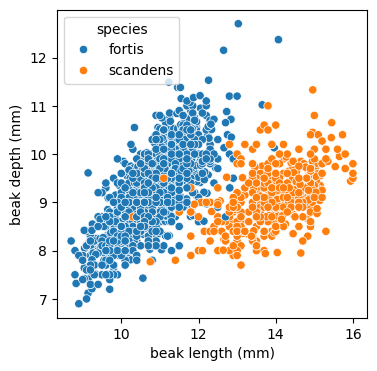

In [35]:
fh, ax = plt.subplots(1,1, figsize=(4,4))
sns.scatterplot(data=beak_df,
                x='beak length (mm)',
                y='beak depth (mm)',
                hue='species',
                ax=ax)

There are lots of datapoints here, so let's try to visualize the distributions a bit better using a **jointplot**, which shows the points as well as marginal distributions on the sides

In [ ]:
# note: alpha is the transparency of the oints - lower alpha # means more transcparent

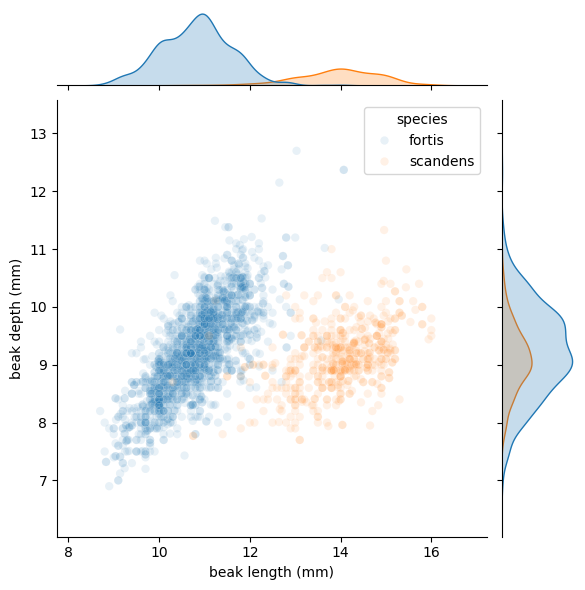

In [41]:
sns.jointplot(data=beak_df,
                x='beak length (mm)',
                y='beak depth (mm)',
                hue='species',
              kind='scatter',
              alpha=0.1)

### <span style='color:red;'>EXERCISE 2</span>: Test the hypothesis that scandens has a longer beak than fortis (10 min)
Use scipy.stats.mannwhitneyu() to perform a hypothesis test to compare beak lenght between the two species

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

*Hint:
It will be cleaner to first assign new variables for the two groups you are comparing, call them

`beak_len_fortis`

`beak_len_scandens`


In [ ]:
# x,y format in the brackets of the mannwhitneyu function

In [56]:
beak_len_fortis = beak_df.query('species == "fortis"')['beak length (mm)']
beak_len_scandens = beak_df.query('species == "scandens"')['beak length (mm)']

statistics, p = stats.mannwhitneyu(beak_len_fortis,beak_len_scandens)
print(statistics, p)

8809.0 3.516005999313483e-246


In [57]:
beak_len_fortis = beak_df.query('species == "fortis"')['beak length (mm)']
beak_len_scandens = beak_df.query('species == "scandens"')['beak length (mm)']

statistics, p = stats.mannwhitneyu(x=beak_len_fortis,
                                   y=beak_len_scandens)
print(statistics, p)

8809.0 3.516005999313483e-246


In [ ]:
# pulling out from your full data what you want to do things with

## 2) Machine learning classification

The beak size distributions are pretty non-overlapping, which suggests that we should be able to predict the species based on beak measurements alone. One way to do this is with a classifier model.

We are going to use a simple, commmon model called a **Support Vector Machine (SVM)**.

let's install / import the python machine learning library scikit-learn

%pip install scikit-learn


sklearn has an implementation of an SVM for classification called a **Support Vector Classifier (SVC)**



### Getting the data ready
we need a features matrix, (by convention we'll call it X), which is shape = (n_samples, n_features), for us n_features will be 2
and a values matrix (y), which will be length n_samples and just be the species name for each sample

The steps for doing this kind of classification are:
1. Split the data into training data and testing data
2. Fit the model
3. Predict some testing data and evaluate the model's performance

### Visualizing the decision boundary
SVM works by forming a decision boundary in the feature space that splits points into each class. In this case the feature space is just two dimensional, so it's easy to visualize. But in principle this can be a high dimensional feature space